<a href="https://colab.research.google.com/github/RAdvaithVIT/Deep-Learning-Codes/blob/main/Auto_Regressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

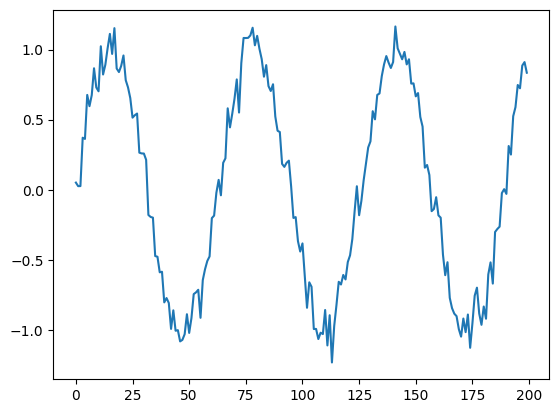

In [6]:
#making an original sinewave data with noice

series=np.sin(0.1*np.arange(200))+np.random.randn(200)*0.1

plt.plot(series)

In [7]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print(X.shape, Y.shape)

(190, 10) (190,)


In [8]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse',
              optimizer=optimizer
              )

#training the RNN

r=model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.2149 - val_loss: 0.1400
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1160 - val_loss: 0.0974
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0802 - val_loss: 0.0966
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0846 - val_loss: 0.0956
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0922 - val_loss: 0.0800
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0707 - val_loss: 0.0641
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0546 - val_loss: 0.0541
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0491 - val_loss: 0.0498
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0481 - val_loss: 0.0459
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0427 - val_loss: 0.0402
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0357 - val_loss: 0.0341
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0316 - val_loss: 0.0302


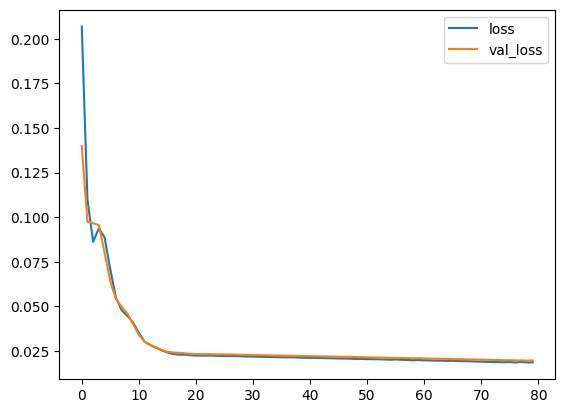

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
validation_target=Y[-N//2:]
validation_predictions=[]

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p=model.predict(last_x.reshape(1,-1))[0,0]
    validation_predictions.append(p)

    last_x=np.roll(last_x,-1)
    last_x[-1]=p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

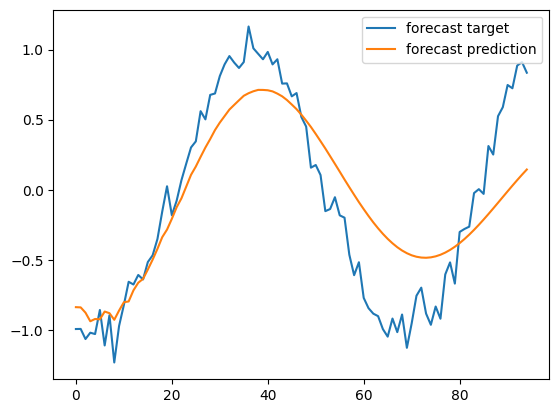

In [11]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()